In [1]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
os.chdir("../src")
from build_network_object import build_network_object
from draw_network_by_classification import draw_network_by_classification, compare_degrees_strength
from draw_adjacency_matrix import draw_adjacency_matrix
from draw_and_print_communities import draw_and_print_communities

In [2]:
label = "Table1_Reduced_matrix_2009_2013_flows"

reduced_matrix = pd.read_csv("../data/"+label+".csv")

reduced_matrix[reduced_matrix['Counts']<1].sort_values(by=['Counts'], ascending=False)[1:1000]

Unnamed: 0  StartIndst  FinalIndst    Counts  \
1936        1937        1813        1712  0.999837   
2052        2053        2731        2732  0.999821   
2049        2050        1712        1813  0.999707   
1948        1949        2812        2814  0.999675   
1966        1967        2620        2899  0.999610   
1833        1834        3040        3311  0.999594   
2031        2032        2814        2812  0.999577   
2019        2020        2899        2620  0.999561   
1925        1926        2362         812  0.999545   
2038        2039        1722        1729  0.999512   
1862        1863        4643        2751  0.999496   
2037        2038        1729        1722  0.999496   
1969        1970         812        2362  0.999480   
1916        1917         119         113  0.999366   
2047        2048        3311        3040  0.999350   
2033        2034        2611        2612  0.999323   
1883        1884        2751        4643  0.999285   
1941        1942        2012        2016  0.999269   
1866        1867        3103        3109  0.999269   
1996        1997        3109        3103  0.999236   
1977        1978        2016        2012  0.999171   
1965        1966        2612        2611  0.999123   
2048        2049         113         119  0.999106   
2053        2054        8122        7729  0.998993   
2030        2031        2229        2896  0.998960   
1816        1817        7729        8122  0.998895   
1710        1711        2332        2361  0.998863   
1632        1633        4763        4761  0.998813   
1749        1750        2896        2229  0.998798   
1634        1635        4675        1920  0.998700   
...          ...         ...         ...       ...   
319          320        7022        7820  0.308913   
233          234        4775        4711  0.306364   
1344        1345        4711        5813  0.303509   
450          451        8710        8690  0.300563   
1103        1104        4771        6831  0.300187   
1235        1236        8810        8299  0.296962   
804          805        8559        8810  0.293212   
1403        1404        8121        9312  0.290928   
1171        1172        8520        8425  0.290300   
838          839        5610        9200  0.285053   
402          403        9499        5610  0.284845   
41            42        8891        8520  0.284793   
1058        1059        8790        8891  0.281135   
81            82        9319        8520  0.279913   
342          343        8299        7820  0.278508   
1404        1405        8899        9312  0.278137   
348          349        5813        7820  0.277172   
1053        1054        4771        8891  0.276598   
1766        1767        8520        9001  0.274987   
1036        1037        7022        8110  0.271140   
678          679        4771        5630  0.270589   
1254        1255        8542        9311  0.269077   
395          396        9200        5610  0.265073   
368          369        1013        7820  0.264811   
478          479        9311        8542  0.263811   
1225        1226        5610        8299  0.263524   
907          908        7022        5510  0.260111   
948          949        9312        8531  0.259850   
1334        1335        4711        4773  0.259046   
1311        1312        7820        3811  0.256774   

                 SubActivity_StartIndst              SubActivity_FinalIndst  \
1936      Pre-press, pre-media services                   Paper, paperboard   
2052                 Fibre optic cables    Other electronic, electric wires   
2049                  Paper, paperboard       Pre-press, pre-media services   
1948              Fluid power equipment                  Other taps, valves   
1966    Computers, peripheral equipment                               Other   
1833         Military fighting vehicles           Fabricated metal products   
2031                 Other taps, valves               Fluid power equipment   
2019                     

In [3]:
Gm_simple = build_network_object(reduced_matrix,'Counts')


/Users/crangelsmith/PycharmProjects/KnowledgeFlows/python/labour_flows_matrix/src/build_network_object.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  matrix_df_connections_no_noise['weight'] = matrix_df_connections_no_noise[label]


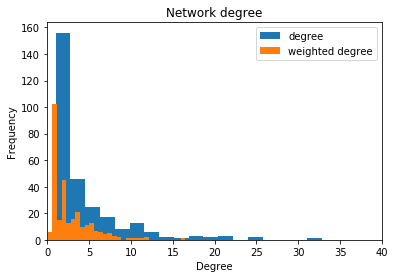

mean degree 4.356643356643357
mean strenght 2.798425538293991


In [4]:
compare_degrees_strength(Gm_simple)

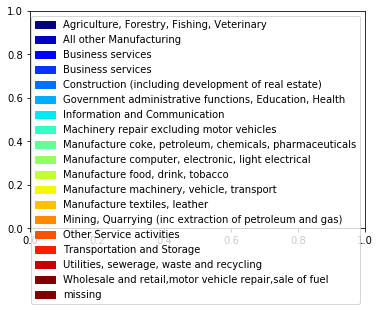

0

In [5]:
draw_network_by_classification(Gm_simple,'mainindustry')

![text](../img/network_industry.png)

In [6]:
draw_adjacency_matrix(reduced_matrix,['StartIndst','FinalIndst'],'Counts')

In [7]:
network_components = Gm_simple.components()
network_largest = network_components.subgraphs()[0]


In [8]:
net_community = network_largest.community_multilevel(weights=network_largest.es['weight'])

In [9]:
draw_and_print_communities(network_largest,net_community)

Community : 1
['Primary', 'Technical, vocational secondary', 'General secondary', 'Child day-care', 'Fire service activities', 'Other nec', 'Other', 'Households as employers', 'Religious organisations', 'Pre-primary', 'Performing arts', 'Other amusement, recreation', 'Library and archive activities', 'Hospital activities', 'Other', 'Residential nursing care', 'General medical practices', 'Health care, education etc', 'Learning, mental, substance abuse', 'Dental practices', 'Specialist medical practices', 'Hairdressing, beauty treatment', 'Elderly, disabled', 'Other education nec', 'Other', 'Tertiary', 'Post-secondary non-tertiary', 'Other', 'Elderly, disabled', 'Educational support activities']

Community : 2
['Police, public order, safety activ.', 'Political organisations']

Community : 3
['Other financial services', 'Other monetary intermediation', 'Life insurance', 'Security,commodity contract broking', 'Activities of call centres', 'Other credit granting', 'Fund management activiti

![text](../img/network_community.png)